In [3]:
import numpy as np
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [4]:
data = pd.read_csv("datasetGold.csv",index_col = "Date", parse_dates = True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,1155.2,1160.8,1146.5,1160.4,1160.4,52
2017-01-04,1156.3,1165.0,1156.3,1163.8,1163.8,36
2017-01-05,1172.0,1183.3,1171.5,1179.7,1179.7,500
2017-01-06,1176.5,1176.5,1171.9,1171.9,1171.9,16
2017-01-09,1173.9,1183.6,1173.0,1183.5,1183.5,62


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1236 entries, 2017-01-03 to 2021-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1236 non-null   float64
 1   High       1236 non-null   float64
 2   Low        1236 non-null   float64
 3   Close      1236 non-null   float64
 4   Adj Close  1236 non-null   float64
 5   Volume     1236 non-null   object 
dtypes: float64(5), object(1)
memory usage: 67.6+ KB


In [6]:
len(data)

1236

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1236 entries, 2017-01-03 to 2021-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1236 non-null   float64
 1   High       1236 non-null   float64
 2   Low        1236 non-null   float64
 3   Close      1236 non-null   float64
 4   Adj Close  1236 non-null   float64
 5   Volume     1236 non-null   object 
dtypes: float64(5), object(1)
memory usage: 67.6+ KB


In [8]:
data1=pd.DataFrame(data,columns=['Date','Close'])
data1.index=data1.Date
data1.drop('Date',axis=1,inplace=True)

In [9]:
dataset = data1.values
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(dataset)
trainData.shape

(1236, 1)

In [10]:
train_size = int(np.ceil(len(dataset) * 0.9))
train = trainData[0:int(train_size),:]
len(train)

1113

In [11]:
train

array([[0.        ],
       [0.00381551],
       [0.02165862],
       ...,
       [0.71944787],
       [0.71731568],
       [0.72898665]])

In [12]:
#Create x_train and y_train
X_train = []
y_train = []
for i in range (60,len(train)): #60 : timestep // len(train)) : length of train
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1053, 60, 1)

In [13]:
model = Sequential()

model.add(LSTM(units=128, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=128, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=128, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=64, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [14]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
33/33 - 8s - loss: 0.0209 - 8s/epoch - 252ms/step
Epoch 2/20
33/33 - 3s - loss: 0.0047 - 3s/epoch - 89ms/step
Epoch 3/20
33/33 - 3s - loss: 0.0042 - 3s/epoch - 89ms/step
Epoch 4/20
33/33 - 3s - loss: 0.0042 - 3s/epoch - 87ms/step
Epoch 5/20
33/33 - 3s - loss: 0.0038 - 3s/epoch - 88ms/step
Epoch 6/20
33/33 - 3s - loss: 0.0030 - 3s/epoch - 87ms/step
Epoch 7/20
33/33 - 3s - loss: 0.0034 - 3s/epoch - 90ms/step
Epoch 8/20
33/33 - 3s - loss: 0.0037 - 3s/epoch - 96ms/step
Epoch 9/20
33/33 - 3s - loss: 0.0038 - 3s/epoch - 100ms/step
Epoch 10/20
33/33 - 3s - loss: 0.0032 - 3s/epoch - 101ms/step
Epoch 11/20
33/33 - 3s - loss: 0.0033 - 3s/epoch - 100ms/step
Epoch 12/20
33/33 - 3s - loss: 0.0031 - 3s/epoch - 94ms/step
Epoch 13/20
33/33 - 3s - loss: 0.0025 - 3s/epoch - 102ms/step
Epoch 14/20
33/33 - 3s - loss: 0.0032 - 3s/epoch - 99ms/step
Epoch 15/20
33/33 - 4s - loss: 0.0026 - 4s/epoch - 123ms/step
Epoch 16/20
33/33 - 4s - loss: 0.0027 - 4s/epoch - 129ms/step
Epoch 17/20
33/33 - 4s - l

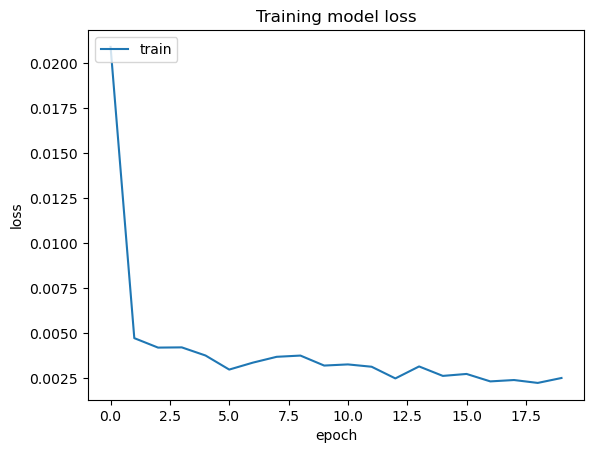

In [15]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [16]:
test = trainData[train_size - 60: , :]
#Create x_test and y_test
x_test = []
y_test = dataset[train_size: , :]
for i in range(60, len(test)):
  x_test.append(test[i - 60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


#Get the models predicted price values
predicted_price = model.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)

4/4 [==============================] - 4s 58ms/step


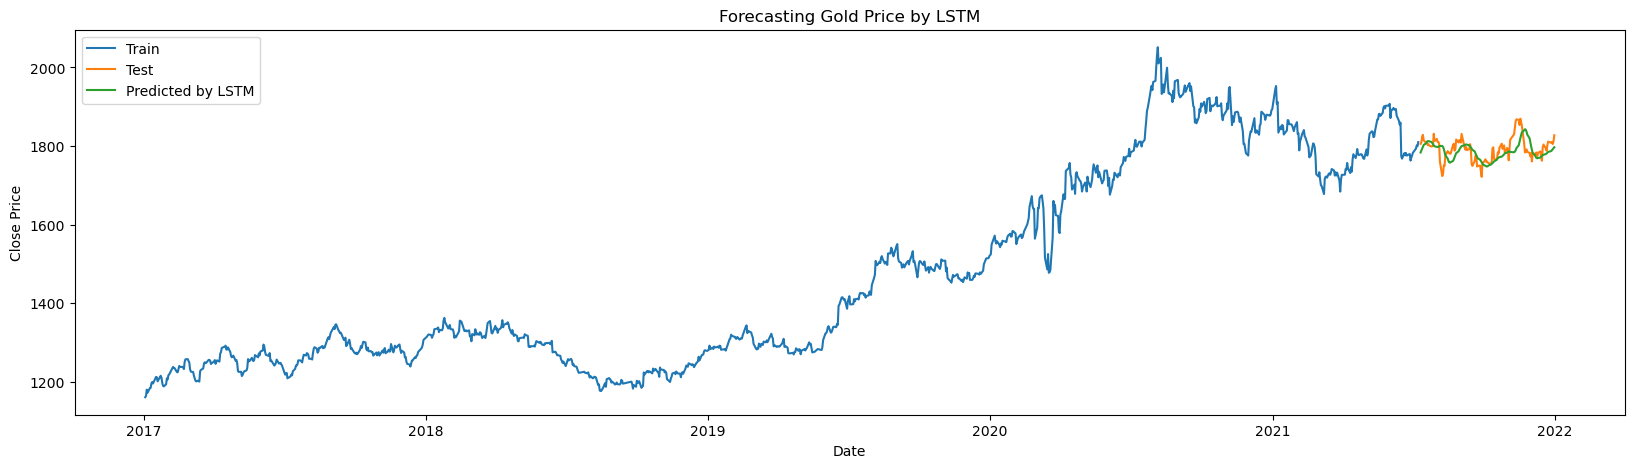

In [20]:
pd.options.mode.chained_assignment = None 
#Plot the data
train1 = data[:train_size]
test1 =  data[train_size:]
test1['Predictions'] = predicted_price
#Visualisze the data
plt.figure(figsize = (20,5))
plt.title("Forecasting Gold Price by LSTM")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.plot(train1['Close'])
plt.plot(test1[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predicted by LSTM'], loc = 'upper left')
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
mse =  mean_squared_error(y_test, predicted_price)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(y_test, predicted_price)
print("RMSE: ", rmse)
print("MAPE: ", mape * 100)

RMSE:  28.041144656434152
MAPE:  1.2303666872746162
